In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
#We are going to import and rename the cancer dataset to medical
medical = pd.read_csv("Cancer_data.csv")
medical

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset has 31 continuous variables, 1 integer and 1 categorical variable

NUMBER 1

Show the distribution of the variable "perimeter_mean" and explain your observations

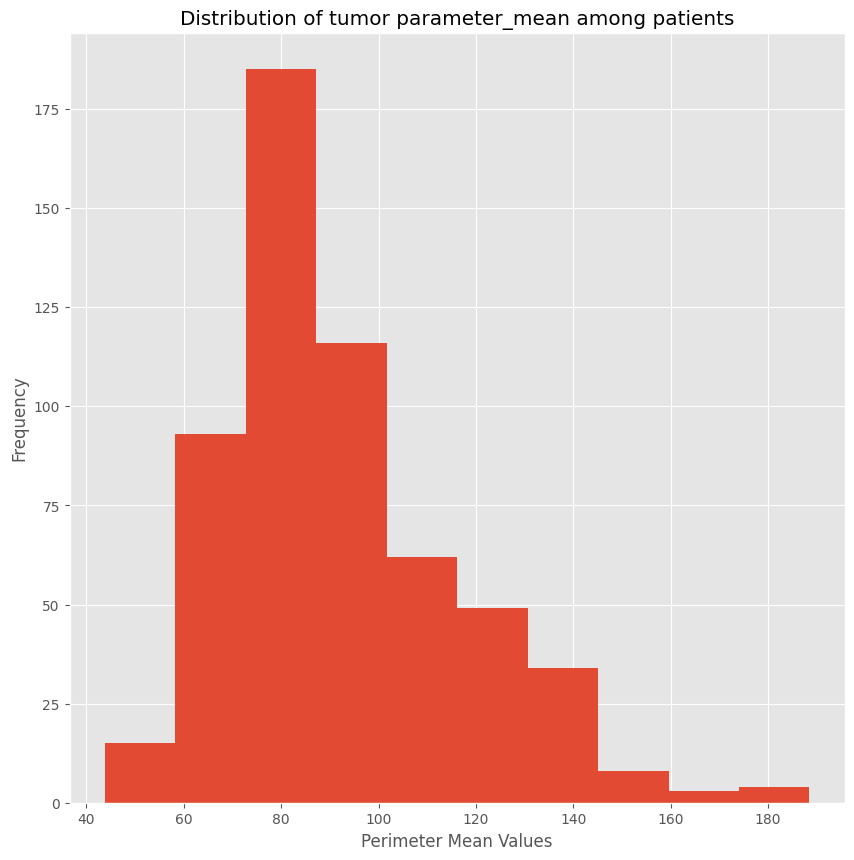

In [10]:
#I am going to show this distribution using a histogram
medical.hist(['perimeter_mean'], figsize=(10,10))
plt.title('Distribution of tumor parameter_mean among patients')
plt.xlabel('Perimeter Mean Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Perimeter mean is not normally distributed. It is right skewed meaning that the mean is greater than the median.

NUMBER 2

Generate statistics to explain the distribution of the above variable

In [11]:
# Ways to explain distribution using statistics includes central tendancy(mean, median, mode) and standard deviation which shows variability.
medical["perimeter_mean"].describe()


count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

Mean = 91.969033

Median = 86.24

Standard deviation = 24.298981
(Each datapoint deviates 24.29 from the mean)

NUMBER 3

Are there any outliers within the aforementioned variable?

In [15]:
#First I am going to use the 'describe' command to be able to view the statistical values of perimeter_mean variable
#From these values I shall use the indexes for the 25th and 75th percentiles to be able to calculate my quartile ranges
dcr = medical['perimeter_mean'].describe()
Q1 = dcr[4]
Q3 = dcr[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = medical[(medical['perimeter_mean'] < lower_bound) | (medical['perimeter_mean'] > upper_bound)].perimeter_mean.values
print("Outliers:", outliers)

Outliers: [171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]


There are 13 outliers in the perimeter_mean variable.

NUMBER 4

Check the effective size of the perimeter_mean and discuss it.


In [16]:
#First I am going to specify variables of the benign tumor and malignant tumor
data_benign = medical[medical["diagnosis"] == "B"]
data_malignant = medical[medical["diagnosis"] == "M"]
#Find the mean difference of the perimeter_mean of the two tumors
mean_diff = data_malignant.perimeter_mean.mean() - data_benign.perimeter_mean.mean()
#
var_benign = data_benign.perimeter_mean.var()
var_malignant = data_malignant.perimeter_mean.var()
var_pooled = (len(data_benign)*var_benign +len(data_malignant)*var_malignant ) / float(len(data_benign)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.288860779081179


The effective size = 2.289 which is a large effective size implying there is a big practical significance between the perimeter_mean of the two patients.


NUMBER 5

What is the marginal probability of the perimeter_mean?

In [21]:
# Create a new variable called perimeter_mean_bin that will include the different intervals in the perimeter_mean variable then find the marginal probabilites for each interval.
bins = [40, 60, 80, 100, 120, 140, 160, 180, 200]
labels = ['40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200']
medical['perimeter_mean_bin'] = pd.cut(medical['perimeter_mean'], bins=bins, labels=labels, right=False)
perimeter_mean_prob = medical['perimeter_mean_bin'].value_counts(normalize=True).sort_index()
perimeter_mean_prob

perimeter_mean_bin
40-60      0.043937
60-80      0.321617
80-100     0.344464
100-120    0.135325
120-140    0.114236
140-160    0.028120
160-180    0.007030
180-200    0.005272
Name: proportion, dtype: float64

NUMBER 6

What is the probability of a tumour having a perimeter_mean less than or equal to 20?

In [26]:
prob_less_20 = medical[medical['perimeter_mean'] <= 20]['perimeter_mean'].count()
probability = prob_less_20/(medical['perimeter_mean'].count())
probability

np.float64(0.0)

The probability of a tumor having a perimeter_mean less than or equal to 20 is 0.

NUMBER 7

What is the relationship between any two continuous variables in the cancer dataset?

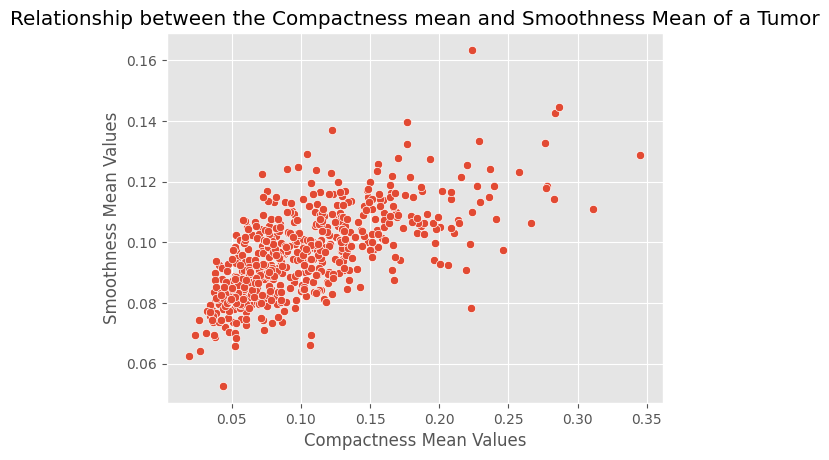

In [29]:
#visualizing the relationship of compactness_mean and smoothness_mean using a scatterplot
sns.scatterplot(x='compactness_mean', y='smoothness_mean', data=medical)
plt.title('Relationship between the Compactness mean and Smoothness Mean of a Tumor')
plt.xlabel('Compactness Mean Values')
plt.ylabel('Smoothness Mean Values')
plt.grid(True)
plt.show()

From the scatter plot we see that the compactness_mean and smoothness_mean of the tumors have a linear relationship. As the smoothness mean increases the compactness mean also increases.

In [30]:
#statistical relationship between the compactness_mean and smoothness_mean
ranked_data = medical.rank()
spearman_corr = ranked_data.loc[:,["smoothness_mean","compactness_mean"]].corr(method= "pearson")
print("Pearson's correlation: ")
print(spearman_corr)

Pearson's correlation: 
                  smoothness_mean  compactness_mean
smoothness_mean          1.000000          0.678806
compactness_mean         0.678806          1.000000


Smoothness_mean and compactness_mean have a moderate positive correlation. 

NUMBER 8

Save the cancer dataset as an excel with your last name.

In [32]:
medical.to_excel('Ndagire.xlsx', index=None, header=True)
